<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

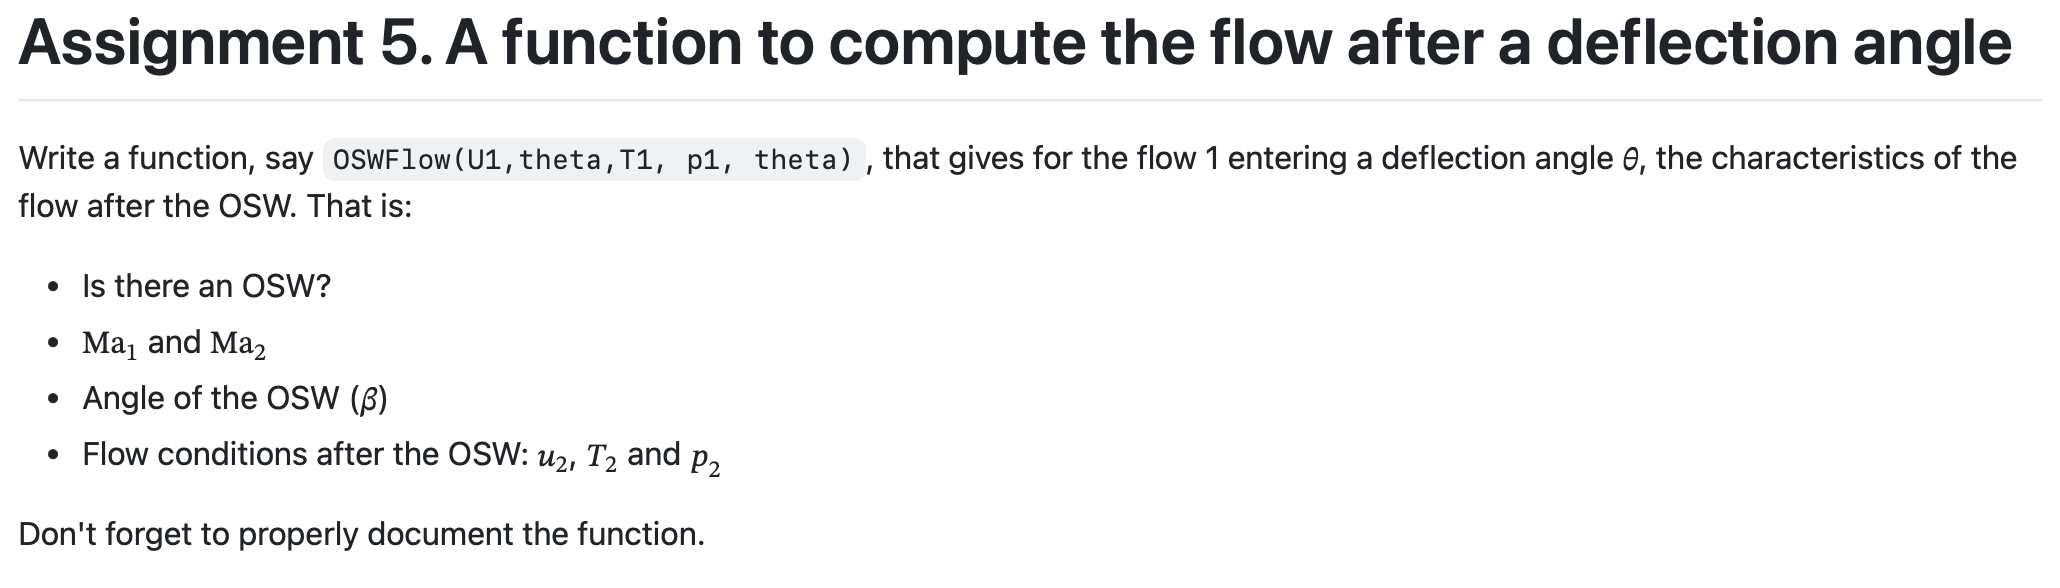

In [52]:
import numpy as np
import sympy as sp

def betaOSW(Ma,theta,gamma=1.4):
    """
    Returns the angle of the SW for an oblique shock wave, given the incident Ma number and the deflection angle theta.
    """
    beta = sp.symbols('beta')
    Eq = sp.Eq(sp.tan(theta), 2/sp.tan(beta)*(Ma**2*sp.sin(beta)**2-1)/(Ma**2*(gamma+sp.cos(2*beta))+2))
    beta = sp.solve(Eq,beta)

    return beta

def ThetaOSW(Ma,beta,gamma=1.4):
    tanTheta = 2/np.tan(beta)*(Ma**2*np.sin(beta)**2-1)/(Ma**2*(gamma+np.cos(2*beta))+2)
    return np.arctan(tanTheta)

def MaxThetaOSW(Ma,gamma=1.4):
    from scipy.optimize import brent
    def f(beta):
        return -ThetaOSW(Ma,beta,gamma)
    interval = (np.deg2rad(50),np.deg2rad(80))
    betaMax = brent(f,brack=interval)
    display(np.rad2deg(betaMax))
    display(np.rad2deg(ThetaOSW(Ma,betaMax,gamma)))
    return np.rad2deg(betaMax),np.rad2deg(ThetaOSW(Ma,betaMax,gamma))

def IsOSW(Ma, theta, gamma=1.4):
    betaMax,MaxTheta = MaxThetaOSW(Ma,gamma)

    if theta < MaxTheta:
        return True
    else:
        return False

def MaShockwave(Ma,gamma=1.4):
    """
    Return the Mach number after a normal shock wave as funtion of Ma before the shock wave.
    """
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        Ma2 = Ma**2
        beta = (gamma-1)/2
        Ma22 = (1+beta*Ma2)/(gamma*Ma2-beta)
        return np.sqrt(Ma22)

def MaOSW(Ma,beta,gamma=1.4):
    """
    Return the Mach number after an oblique shock wave as funtion of Ma before the shock wave.
    """
    M1tan = Ma * np.cos(beta)
    M1nor = Ma * np.sin(beta)
    M2tan = M1tan
    M2nor = MaShockwave(M1nor,gamma)
    return np.sqrt(M2nor**2+M2tan**2)


def T0fromT(Ma,T,gamma=1.4):
  return T*(1 + (gamma-1)/2*Ma**2)

def TfromT0(Ma,T0,gamma=1.4):
  return T0/(1 + (gamma-1)/2*Ma**2)

def P0fromP(Ma,P,gamma=1.4):
  return P*(1 + (gamma-1)/2*Ma**2)**(gamma/(gamma-1))

def PfromP0(Ma,P0,gamma=1.4):
  return P0/(1 + (gamma-1)/2*Ma**2)**(gamma/(gamma-1))




def OSWFlow (U1,theta,T1,p1,r = 287):

  gamma = 1.4
  c1 = np.sqrt(T1*gamma*r)
  display(c1)

  Ma1 = U1/c1
  display(Ma1)

  isOWS = MaxThetaOSW(Ma1,theta)
  beta = betaOSW(Ma1,theta)
  if isOWS:
    print("Wave is OWS")
  else:
    print("Wave is normal")
    beta = np.pi/2

  Ma2 = MaShockwave(Ma1)

  T0 = T0fromT(Ma1,T1)
  T2 = TfromT0(Ma2,T0)

  c2 = np.sqrt(T2*gamma*r)
  u2 = c2*Ma2

  P0 = P0fromP(Ma1,T1)
  P2 = PfromP0(Ma2,T0)
  display(Ma1,Ma2,beta,T0,T2,P0,P2,u2)
  return Ma1,Ma2,beta,T0,T2,P0,P2,u2


U1 = 600
theta = 10*np.pi/180
T1 = 273.15 + 20
p1 = 101325

Ma1,Ma2,beta,T0,T2,P0,P2,u2 = OSWFlow (U1,theta,T1,p1)














np.float64(343.2020833270101)

np.float64(1.7482411359033259)

np.float64(72.99340664705382)

np.float64(89.99999711414978)

Wave is OWS


np.float64(1.7482411359033259)

np.float64(0.6285116083080491)

[]

np.float64(472.3436286709806)

np.float64(437.7583675888778)

np.float64(1556.6051731611592)

np.float64(361.97238777533505)

np.float64(263.59398611111106)